<a href="https://colab.research.google.com/github/dqminhv/fellowship_ai-nlp-challenge/blob/main/notebook/nlp_challenge_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Packages & Load Data

In [1]:
#Ignore warnings in Google Colab
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")

In [2]:
#Mount Google Drive to access the IMDB Review file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
X_file_path = '/content/gdrive/MyDrive/Document/Data Science/Skills Development/fellowshipai/X.csv'
y_file_path = '/content/gdrive/MyDrive/Document/Data Science/Skills Development/fellowshipai/y.csv'

X = pd.read_csv(X_file_path)
y = pd.read_csv(y_file_path)

In [8]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensemble Method: Random Forest

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Make predictions on new data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred) / len(y_test)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8314
Confusion Matrix:
[[0.4139 0.0822]
 [0.0864 0.4175]]


## Feature Importance

In [56]:
# Get feature importances from the model
importances = rf.feature_importances_

# Select the first 500 features and their importances
top_800_features = importances[:800]

# Sort features and importances together by importance (descending order)
sorted_indices = np.argsort(top_800_features)[::-1]
sorted_importances = top_800_features[sorted_indices]

# Calculate cumulative importance
cumulative_importance = np.cumsum(sorted_importances)

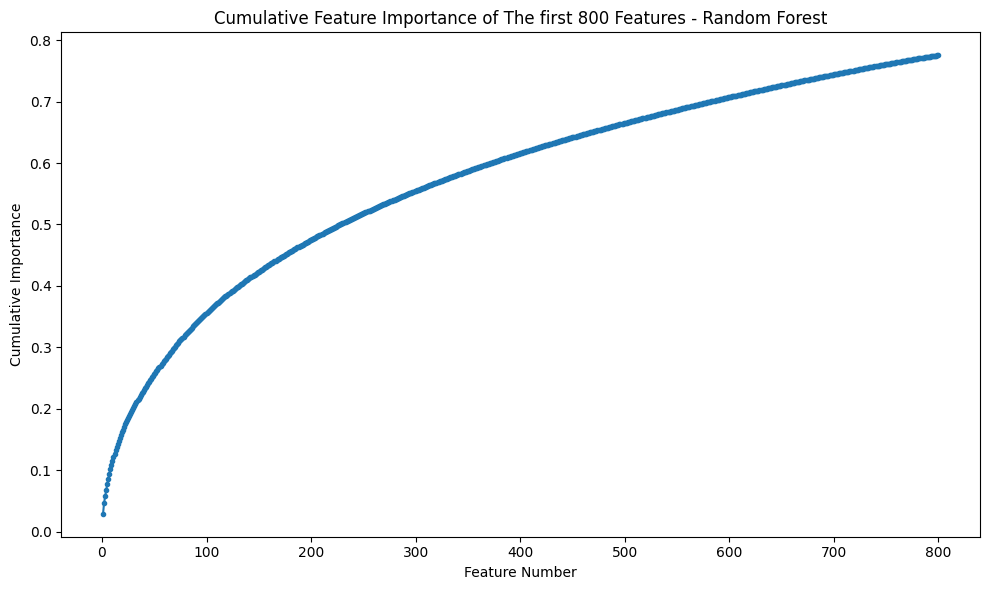

In [59]:
# Plot cumulative feature importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_importances) + 1), cumulative_importance, marker='.', linestyle='-', label='Cumulative Importance')
plt.xlabel('Feature Number')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance of The first 800 Features - Random Forest')
plt.tight_layout()
plt.show()

# Linear Model: Logistic Regression

In [23]:
# Train the Logistic Regression model
lg = LogisticRegression(solver='liblinear')
lg.fit(X_train, y_train)

# Make predictions on new data
y_pred = lg.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm2 = confusion_matrix(y_test, y_pred) / len(y_test)
print("Confusion Matrix:")
print(cm2)

Accuracy: 0.8621
Confusion Matrix:
[[0.4227 0.0734]
 [0.0645 0.4394]]
